In [125]:
!pip install numpy pandas matplotlib scikit-learn tensorflow --upgrade pandas_datareader

In [126]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt

In [127]:
# Read the MSFT stock data from CSV (replace 'MSFT.csv' with your actual file path)
msft_data = pd.read_csv('MSFT-1.csv', parse_dates=['Date'], index_col='Date')  # Assuming 'Date' column exists
close_prices = msft_data['Close'].values.reshape(-1, 1)

# Extract closing prices and calculate returns
closing_prices = msft_data['Close']   # Replace 'Close' if your column is named differently
returns = closing_prices.pct_change()
returns = returns.dropna()  # Remove the first row (NaN due to percentage change calculation)

# Simulate portfolio performance with 100% allocation to MSFT
weights = np.array([1.0])  # Single weight for MSFT
time_period = len(returns)  # Number of trading days in your data

mean_return = returns.mean()
cov_matrix = returns.var()  # Variance for a single asset

portfolio_return = np.sum(mean_return * weights) * time_period
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(time_period)

print("Portfolio Return:", portfolio_return)
print("Portfolio Standard Deviation:", portfolio_std_dev)

print("Mean Return: ", mean_return)

Portfolio Return: 10.125385555447599
Portfolio Standard Deviation: 2.0327133123346233
Mean Return:  0.0011148849983976656


In [128]:

# Monte Carlo simulation for single-asset portfolio
mc_sims = 10
T = 9084
initialPortfolio = 10000

meanM = np.full(shape=(T, 1), fill_value=mean_return)
stock_simulations = np.zeros((T, mc_sims))

for m in range(mc_sims):
    # Generate random returns (note: we only need one column now)
    Z = np.random.normal(size=(T, 1))
    std_dev = np.sqrt(cov_matrix)  # Standard deviation is the square root of variance
    dailyReturns = meanM + Z * std_dev  # Directly scale random values by std_dev

    # Calculate cumulative portfolio values (matrix multiplication with a single column is simplified)
    stock_simulations[:, m] = initialPortfolio * np.cumprod(1 + dailyReturns[:, 0], axis=0)

# Analysis (examples)
mean_portfolios = stock_simulations.mean(axis=1)
percentile_5 = np.percentile(stock_simulations, 5, axis=1)
percentile_95 = np.percentile(stock_simulations, 95, axis=1)

In [129]:
print(stock_simulations)
print("Mean: ", mean_portfolios)

[[1.01049272e+04 1.04503418e+04 9.94580527e+03 ... 9.87644009e+03
  9.70810379e+03 9.77133566e+03]
 [9.88100909e+03 1.08302090e+04 1.00365543e+04 ... 1.00885243e+04
  9.64817826e+03 9.62783015e+03]
 [9.65666814e+03 1.07885884e+04 9.96524062e+03 ... 1.00840020e+04
  9.57406255e+03 9.43760083e+03]
 ...
 [3.02840385e+06 2.68022855e+06 1.43526075e+08 ... 2.15448739e+07
  6.33575466e+06 9.95496558e+07]
 [3.00477811e+06 2.67416911e+06 1.40854075e+08 ... 2.19025013e+07
  6.46585995e+06 1.01433257e+08]
 [3.11819291e+06 2.67607274e+06 1.41164483e+08 ... 2.18699505e+07
  6.40136003e+06 1.03106646e+08]]
Mean:  [1.00502507e+04 1.00277442e+04 1.00166294e+04 ... 4.40078196e+07
 4.43203981e+07 4.44234837e+07]


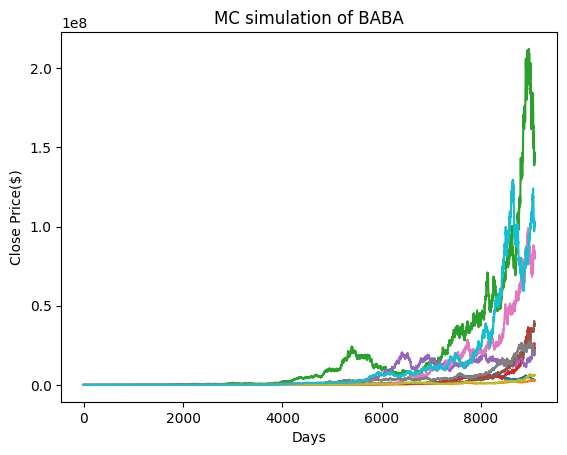

In [130]:
#plt.plot(stock_simulations)
# Working on width
plt.plot(
    dates[len(train_predict) + (time_step * 2) + 1 : len(scaled_data) - 1],
        scaler.inverse_transform(test_predict_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1]),
        label=f'Stock Simulations {i+1}',
        color='green'
)
plt.ylabel('Close Price($)')
plt.xlabel('Days')
plt.title('MC simulation of BABA')
plt.show()

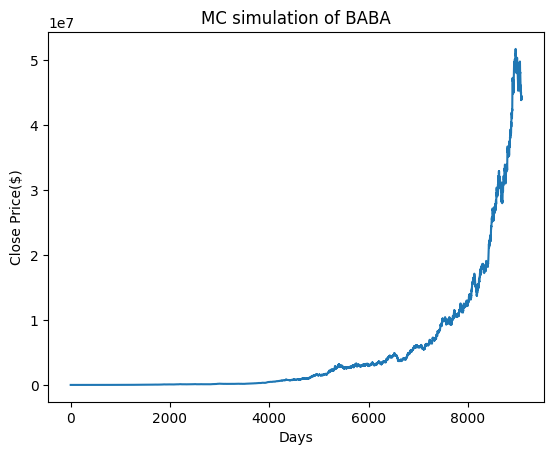

In [131]:
plt.plot(mean_portfolios)
plt.ylabel('Close Price($)')
plt.xlabel('Days')
plt.title('MC simulation of BABA')
plt.show()

In [ ]:
plt.plot(
        dates[len(train_predict) + (time_step * 2) + 1 : len(scaled_data) - 1],
        scaler.inverse_transform(test_predict_plot[len(train_predict)+(time_step*2)+1:len(scaled_data)-1]),
        label=f'Test Prediction {i+1}',
        color='green'
    )